# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men


In [2]:
import pandas as pd
pd.__version__

'1.3.4'

In [13]:

users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [14]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
users.groupby(['occupation','age']).mean()

user_id
occupation    age            
administrator 21   118.000000
              22   259.666667
              23   474.000000
              25   595.000000
              26    82.000000
...                       ...
writer        50   637.500000
              51   548.000000
              52   381.000000
              56   558.000000
              60   464.000000

[429 rows x 1 columns]

In [25]:
def genderval(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0 
    

In [26]:
users['gender_n'] = users['gender'].apply(genderval)



In [27]:
muser = users.groupby('occupation')['gender_n'].sum() / users.occupation.value_counts() * 100

muser.sort_values(ascending=False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [28]:
users.groupby('occupation')['age'].agg(['min','max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [29]:
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [30]:
ogcount = users.groupby(['occupation','gender']).agg({'gender':'count'})

ocount = users.groupby(['occupation']).agg('count')



In [31]:
oc = ogcount.div(ocount,level='occupation') * 100

oc.loc[:,'gender']


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2
Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [33]:
import numpy as np

In [35]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [36]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [37]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [38]:
euro12.Team.nunique()

16

In [39]:
euro12.shape[1]

35

In [40]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [41]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [42]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)

C:\Users\samra\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [46]:
discipline['Yellow Cards'].sum() / len(discipline['Yellow Cards'])

7.4375

In [47]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [48]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [49]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [50]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [51]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [52]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [53]:
import random

In [54]:
first = pd.Series(np.random.randint(1,4,100))
second = pd.Series(np.random.randint(1,3,100))
third = pd.Series(np.random.randint(10000,30000,100))



In [55]:
series_col = pd.concat([first,second,third],axis=1)
series_col.head()


,0,1,2
0,3,2,20651
1,3,2,29860
2,1,2,14657
3,2,1,23066
4,3,2,23879


In [56]:
series_col.columns = ['bedrs','bathrs','price_sqr_meter']
series_col.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,20651
1,3,2,29860
2,1,2,14657
3,2,1,23066
4,3,2,23879


In [57]:
bigcolumn = pd.concat([first,second,third],axis=0)
bigcolumn


0         3
1         3
2         1
3         2
4         3
      ...  
95    19168
96    25743
97    27650
98    29134
99    18489
Length: 300, dtype: int32

In [58]:
len(bigcolumn)

300

In [59]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          3
2          1
3          2
4          3
       ...  
295    19168
296    25743
297    27650
298    29134
299    18489
Length: 300, dtype: int32

# Question 4
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.


In [60]:
import datetime

In [64]:
wind_data = pd.read_table('wind.txt', sep='\s+',parse_dates = [[0,1,2]])
wind_data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [65]:
def year_per(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

wind_data['Yr_Mo_Dy'] = wind_data['Yr_Mo_Dy'].apply(year_per)

wind_data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [66]:
wind_data["Yr_Mo_Dy"] = pd.to_datetime(wind_data["Yr_Mo_Dy"])
wind_data = wind_data.set_index('Yr_Mo_Dy')
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [67]:
wind_data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [68]:
wind_data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [69]:
wind_data.sum().sum() / wind_data.notna().sum().sum()

10.227883764282181

In [70]:
wind_data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [72]:
day_stats = pd.DataFrame()
day_stats['min'] = wind_data.min(axis = 1) 
day_stats['max'] = wind_data.max(axis = 1) 
day_stats['mean'] = wind_data.mean(axis = 1) 
day_stats['std'] = wind_data.std(axis = 1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [74]:
wind_data.loc[wind_data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [75]:
wind_data.groupby(wind_data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [76]:
wind_data.groupby(wind_data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [77]:
wind_data.groupby(wind_data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [78]:
weekly = wind_data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Question 5
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

In [79]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')

In [80]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [81]:
chipo.shape

(4622, 5)

In [82]:
chipo.shape[1]

5

In [83]:
chipo.head(0)

,order_id,quantity,item_name,choice_description,item_price


In [85]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [86]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [87]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [88]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [89]:
chipo.item_name.count()

4622

In [90]:
chipo.item_price.dtype

dtype('O')

In [95]:

chipo.item_price.dtype


dtype('float64')

In [96]:
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Total Revenue is : $ '+ str(revenue))

Total Revenue is : $ 39237.02


In [97]:
chipo.order_id.value_counts().count()

1834

In [99]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [100]:
chipo.item_name.value_counts().count()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [102]:
import matplotlib.pyplot as plt
%matplotlib inline


In [134]:
usmd_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = usmd_data['Year'].values
number_marriages= usmd_data['Marriages_per_1000'].values
number_divorces = usmd_data['Divorces_per_1000'].values
usmd_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


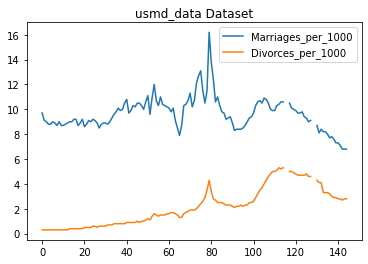

In [167]:
# get columns to plot
columns = usmd_data.columns.drop(['Year','Marriages','Divorces','Population'])


# create x data
x_data = range(0, usmd_data.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, usmd_data[column])
# set title and legend
ax.set_title('usmd_data Dataset')
ax.legend(columns)

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes

In [130]:
usmd_data = usmd_data[
    usmd_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = usmd_data['Year'].values
number_marriages= usmd_data['Marriages_per_1000'].values
number_divorces = usmd_data['Divorces_per_1000'].values

Text(0, 0.5, 'divorces per capita')

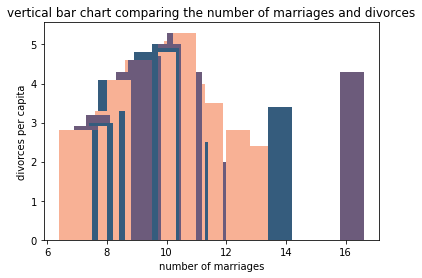

In [161]:
colours = ['#F8B195','#6C5B7B','#355C7D'] 
plt.bar(number_marriages,number_divorces,color=colours)
#usmd_data['Marriages_per_1000'].value_counts().sort_index().plot.bar(color=colours)

plt.title("vertical bar chart comparing the number of marriages and divorces")
plt.xlabel("number of marriages")
plt.ylabel("divorces per capita")

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


In [105]:
ha_kills = pd.read_csv('actor_kill_counts.csv')
ha_kills

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [106]:
actor_names = ha_kills['Actor'].values
kill_counts = ha_kills['Count'].values

Text(0, 0.5, 'kill count')

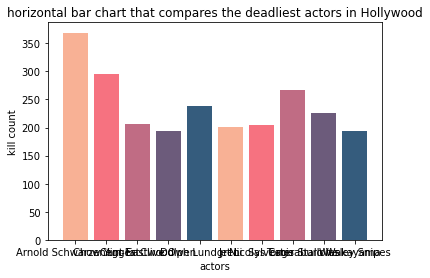

In [162]:
colours = ['#F8B195','#F67280','#C06C84','#6C5B7B','#355C7D'] 
plt.bar(actor_names,kill_counts,color=colours)

plt.title("horizontal bar chart that compares the deadliest actors in Hollywood")
plt.xlabel("actors")
plt.ylabel("kill count")

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories

In [146]:
r_emperors = pd.read_csv('roman-emperor-reigns.csv')
a_emperors = r_emperors[
    r_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
number_assassinated = len(a_emperors)
other_deaths = len(r_emperors) - number_assassinated

In [150]:
a_emperors

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated


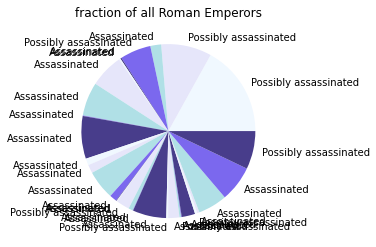

In [151]:
plt.pie(a_emperors['Length_of_Reign'], labels = a_emperors['Cause_of_Death'],colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('fraction of all Roman Emperors')
#Show the plot
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [144]:
arc_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arc_doctorates['Total Arcade Revenue (billions)'].values
csd_awarded = arc_doctorates[
    'Computer Science Doctorates Awarded (US)'].values


Text(0, 0.5, 'csd_awarded')

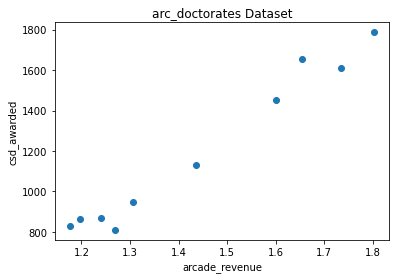

In [145]:
# create a figure and axis
fig, ax = plt.subplots()

#ax.scatter(arc_doctorates['Total Arcade Revenue (billions)'], arc_doctorates['Computer Science Doctorates Awarded (US)'])

# scatter the revenue against the awarded
ax.scatter(arcade_revenue, csd_awarded)
# set a title and labels
ax.set_title('arc_doctorates Dataset')
ax.set_xlabel('arcade_revenue')
ax.set_ylabel('csd_awarded')